# Лабораторная работа №2
## Тема: Метод Ньютона

In [1]:
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)

#### Условие

In [39]:
def f(x):
    y = ((x[0]+7)**2 + 4*(x[1]-3)**2+2*(x[0]+7)*(x[1]-3))
#     y = x[0]**2 + 2*x[1]**2 + 0.012*x[0]*x[1] - 2*x[0] + x[1]
#     y = (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2  # rosenbrock
    return y

#### График функции

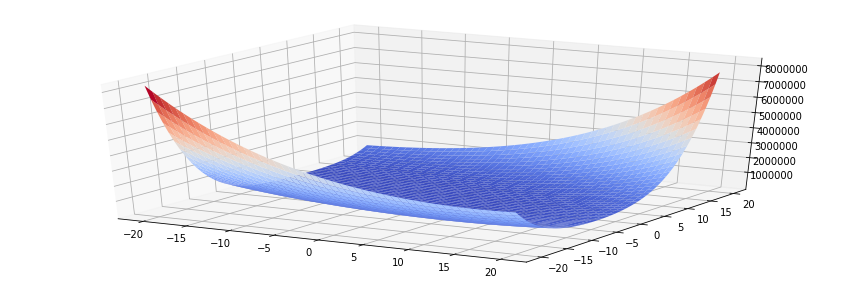

In [13]:
temp = np.arange(-20, 20, 0.1)
a, b = np.meshgrid(temp, temp)
c = f((a, b))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, c, cmap=cm.coolwarm)

#### Производные функции

In [14]:
def df(x, h_step=0.01):
    h_matr = h_step * np.eye(x.shape[0])
    y = np.array([(f(x+h) - f(x-h))/(2*h_step) for h in h_matr])
    return y

In [15]:
def d2f(x, h_step=0.01):
    h_matr = h_step * np.eye(x.shape[0])
    y = np.array([(df(x+h) - df(x-h))/(2*h_step) for h in h_matr])
    return y

#### Метод Ньютона с дроблением шага

In [16]:
def run_shredded(start_data, error=1e-6):
    x_arr = copy(start_data)
    coef = 0.5
    eps = 1/4
    alpha=1
    count = 0
    while True:
        x = x_arr[-1]
        h = np.linalg.inv(d2f(x)) @ df(x)
        x_next = x - alpha * h
        if f(x_next) - f(x) >= eps * alpha * df(x)@h:
            alpha = coef * alpha
        x_arr.append(x_next)
        if np.linalg.norm(x_next - x) < error:
            break
        count += 1
    return x_arr

#### Метод Ньютона ($\alpha$ как min антиградиента)

In [32]:
def run_fastest(start_data, error=1e-6):
    x_arr = copy(start_data)
    count = 0
    while True:
        x = x_arr[-1]
        h = np.linalg.inv(d2f(x)) @ df(x)
        A = d2f(x)
        alpha = (h @ h)/(A @ h @ h)
        x_next = x - alpha * h
        x_arr.append(x_next)
        if np.linalg.norm(x_next - x) < error:
            break
        count += 1
        if count >=10000:
            break
    return x_arr

#### Демонстрация

In [18]:
plt.rcParams["figure.figsize"] = (15, 5)

In [42]:
size = 10
start = list([2*size*(np.random.random(2) - 0.5)])
e = 1e-6

temp = np.arange(-1*size-0.5, size+0.5, 0.1)
a, b = np.meshgrid(temp, temp)
c = f((a, b))

In [34]:
start

[array([-7.83501181,  0.14771134])]

Text(0.5, 1.0, 'Метод Ньютона з дробленням кроку - 3')

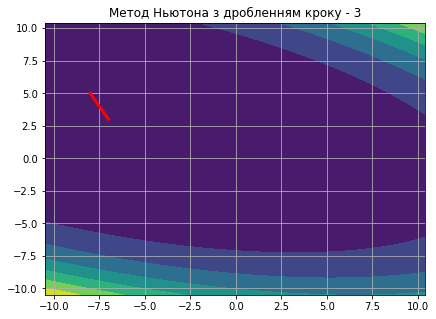

In [41]:
plt.subplot(1, 2, 1)
plt.contourf(a, b, c)
plt.grid()
first = run_shredded(start, e)
plt.plot([i[0] for i in first], [i[1] for i in first], linewidth=3, color='red')
plt.gca().set_title(r'Метод Ньютона з дробленням кроку - ' + f'{len(first)}')

In [24]:
first[-1]

array([-6.99999877,  2.99999997])

Text(0.5, 1.0, 'Метод Ньютона ($\\alpha$ як min антиградієнта) - 63')

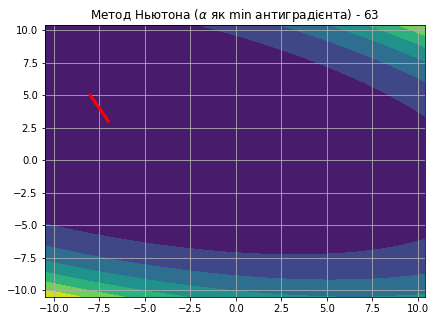

In [40]:
plt.subplot(1, 2, 2)
plt.contourf(a, b, c)
plt.grid()
second = run_fastest(start, e)
plt.plot([i[0] for i in second], [i[1] for i in second], linewidth=3, color='red')
plt.gca().set_title(r'Метод Ньютона ($\alpha$ як min антиградієнта) - ' + f'{len(second)}')

In [38]:
second[-10:]

[array([-9.12779114,  3.33416623]),
 array([-9.10606056,  3.33075415]),
 array([-9.08410577,  3.32730687]),
 array([-9.06191971,  3.32382328]),
 array([-9.03949495,  3.32030223]),
 array([-9.01682363,  3.31674246]),
 array([-8.99389748,  3.3131427 ]),
 array([-8.97070774,  3.30950155]),
 array([-8.94724513,  3.30581757]),
 array([-8.92349984,  3.30208922])]

KeyboardInterrupt: 

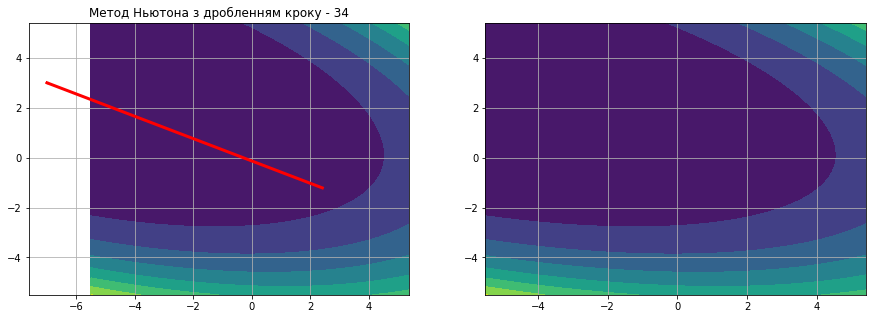

In [19]:
plt.show()